Enter the stock symbol (e.g., AAPL): MSFT
Mean Squared Error: 0.3891532257591815
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}


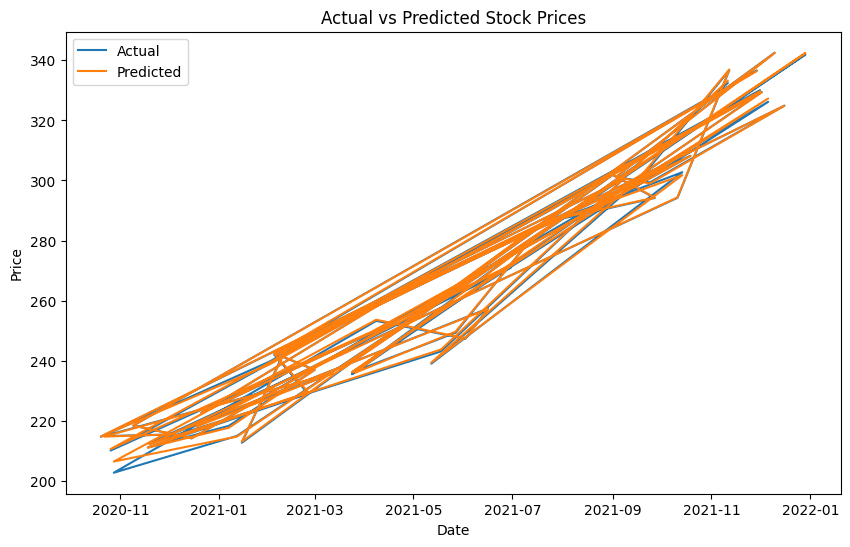

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

# Function to download historical stock data
def download_stock_data(ticker, start_date, end_date):
    try:
        stock_data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        return stock_data
    except Exception as e:
        print("Error:", e)

# Function for feature engineering
def engineer_features(data):
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()
    data['Volatility'] = data['Close'].rolling(window=50).std()
    data['Returns'] = data['Close'].pct_change()
    data.dropna(inplace=True)
    return data

# Function to split data into train and test sets
def split_data(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

# Function to train model with hyperparameter tuning
def train_model(X_train, y_train):
    parameters = {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 4, 5]}
    model = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    return best_model, best_params

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse, predictions

# Function to visualize model predictions
def visualize_predictions(y_test, predictions):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test.values, label='Actual')
    plt.plot(y_test.index, predictions, label='Predicted')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def main():
    # User input for stock symbol
    ticker = input("Enter the stock symbol (e.g., AAPL): ")

    # Define parameters
    start_date = '2020-01-01'
    end_date = '2022-01-01'

    # Download and preprocess data
    stock_data = download_stock_data(ticker, start_date, end_date)
    if stock_data is None:
        return
    stock_data = engineer_features(stock_data)

    # Define features and target variable
    X = stock_data[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_50', 'SMA_200', 'Volatility', 'Returns']]
    y = stock_data['Close']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train model with hyperparameter tuning
    model, best_params = train_model(X_train, y_train)

    # Evaluate model performance
    mse, predictions = evaluate_model(model, X_test, y_test)
    print("Mean Squared Error:", mse)
    print("Best Hyperparameters:", best_params)

    # Visualize model predictions
    visualize_predictions(y_test, predictions)

if __name__ == "__main__":
    main()
